In [1]:
%pylab inline
from __future__ import division
import os
import numpy as np
import scipy.misc
import tensorflow as tf
from SfMLearner import SfMLearner
from utils import *

mode = 'depth'
img_height=128
img_width=416
ckpt_file = 'models/model-145248'
I = scipy.misc.imread('misc/sample.png')
I = scipy.misc.imresize(I, (img_height, img_width))

Populating the interactive namespace from numpy and matplotlib


In [2]:
sfm = SfMLearner(batch_size=1,
                 img_height=img_height,
                 img_width=img_width)
sfm.setup_inference_graph(mode=mode)

In [3]:
saver = tf.train.Saver([var for var in tf.trainable_variables()]) 
with tf.Session() as sess:
    saver.restore(sess, ckpt_file)
    pred = sfm.inference(I[None,:,:,:], sess, mode=mode)

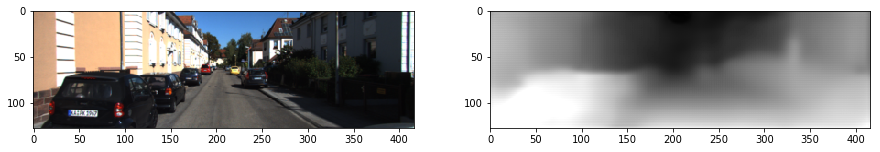

In [4]:
figure(figsize=(15,15))
subplot(1,2,1); imshow(I)
subplot(1,2,2); imshow(normalize_depth_for_display(pred['depth'][0,:,:,0]))